In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_dataset=pd.read_csv("train.csv")
test_dataset=pd.read_csv("test.csv")

In [104]:
train_dataset.head(4)
#test_dataset.head(4)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2


In [15]:
train_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [17]:
train_dataset.describe()
test_dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
print(train_dataset.shape)
print(test_dataset.shape)

(891, 12)
(418, 11)


In [61]:
train_dataset.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
train_dataset['Age'].fillna(train_dataset['Age'].median(), inplace=True)

In [65]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
#train_dataset['Cabin'].value_counts()

In [71]:
train_dataset['Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [73]:
train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode(), inplace=True)

In [102]:
s=[]
for col in train_dataset.columns:
    if train_dataset[col].dtype== object:
        s.append(col)
s         

['Name', 'Sex', 'Ticket', 'Cabin']

In [108]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in s:
    train_dataset[col]=LE.fit_transform(train_dataset[col])

In [120]:
 train_dataset.Sex=LE.fit_transform(train_dataset.Sex)

In [122]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


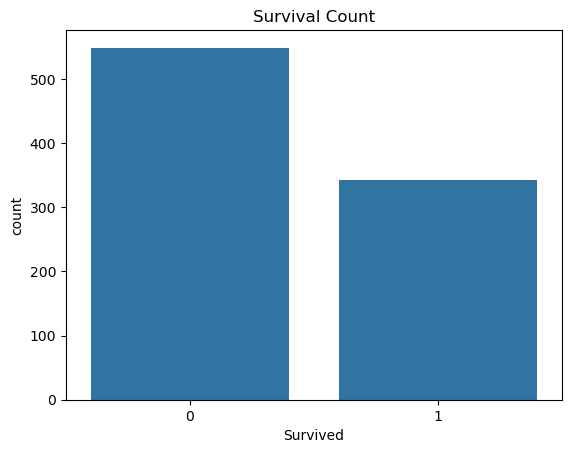

In [128]:

sns.countplot(data=train_dataset, x='Survived')
plt.title('Survival Count')
plt.show()

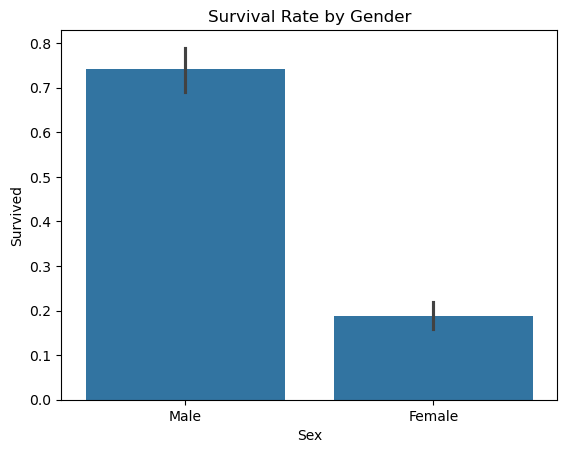

In [132]:
sns.barplot(data=train_dataset, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()



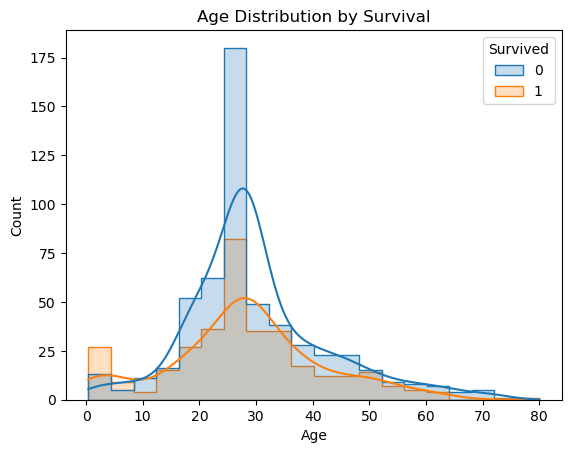

In [134]:

sns.histplot(data=train_dataset, x='Age', bins=20, kde=True, hue='Survived', element="step")
plt.title('Age Distribution by Survival')
plt.show()

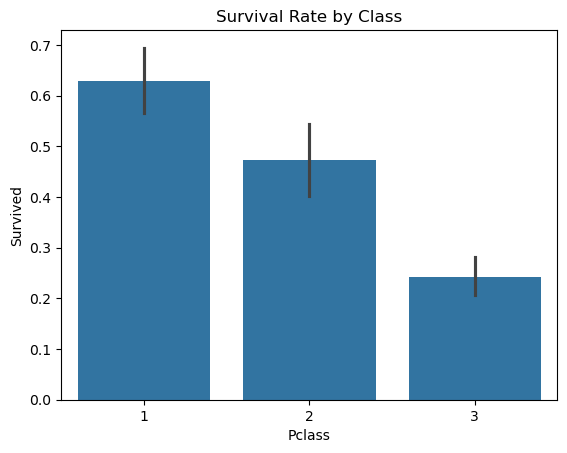

In [138]:
sns.barplot(data=train_dataset, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')
plt.show()



In [148]:
#train_dataset.drop('Name',inplace= True, axis=1)


In [150]:
train_dataset.drop('Ticket',inplace= True, axis=1)


In [154]:
train_dataset.drop('Cabin',inplace= True, axis=1)


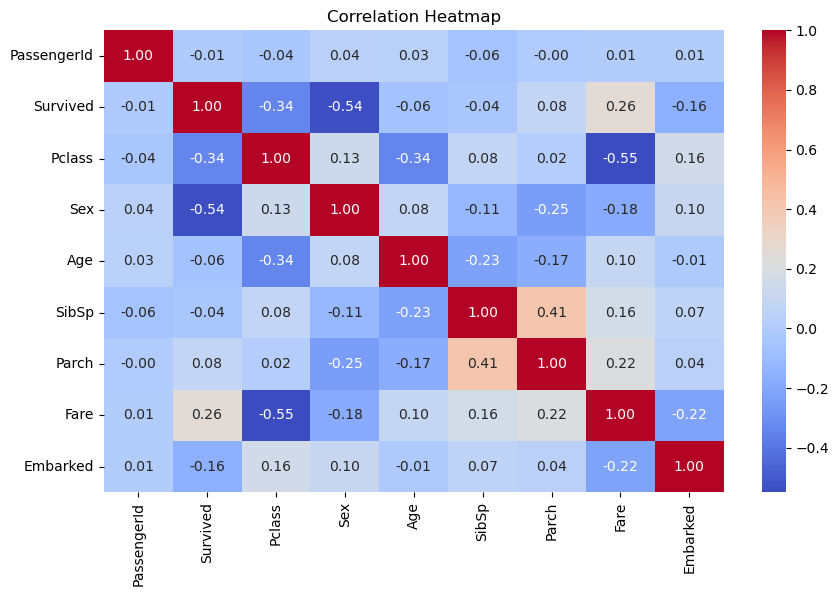

In [156]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()